**Package Required**

In [62]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [63]:
# Loading dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [64]:
# Loading Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


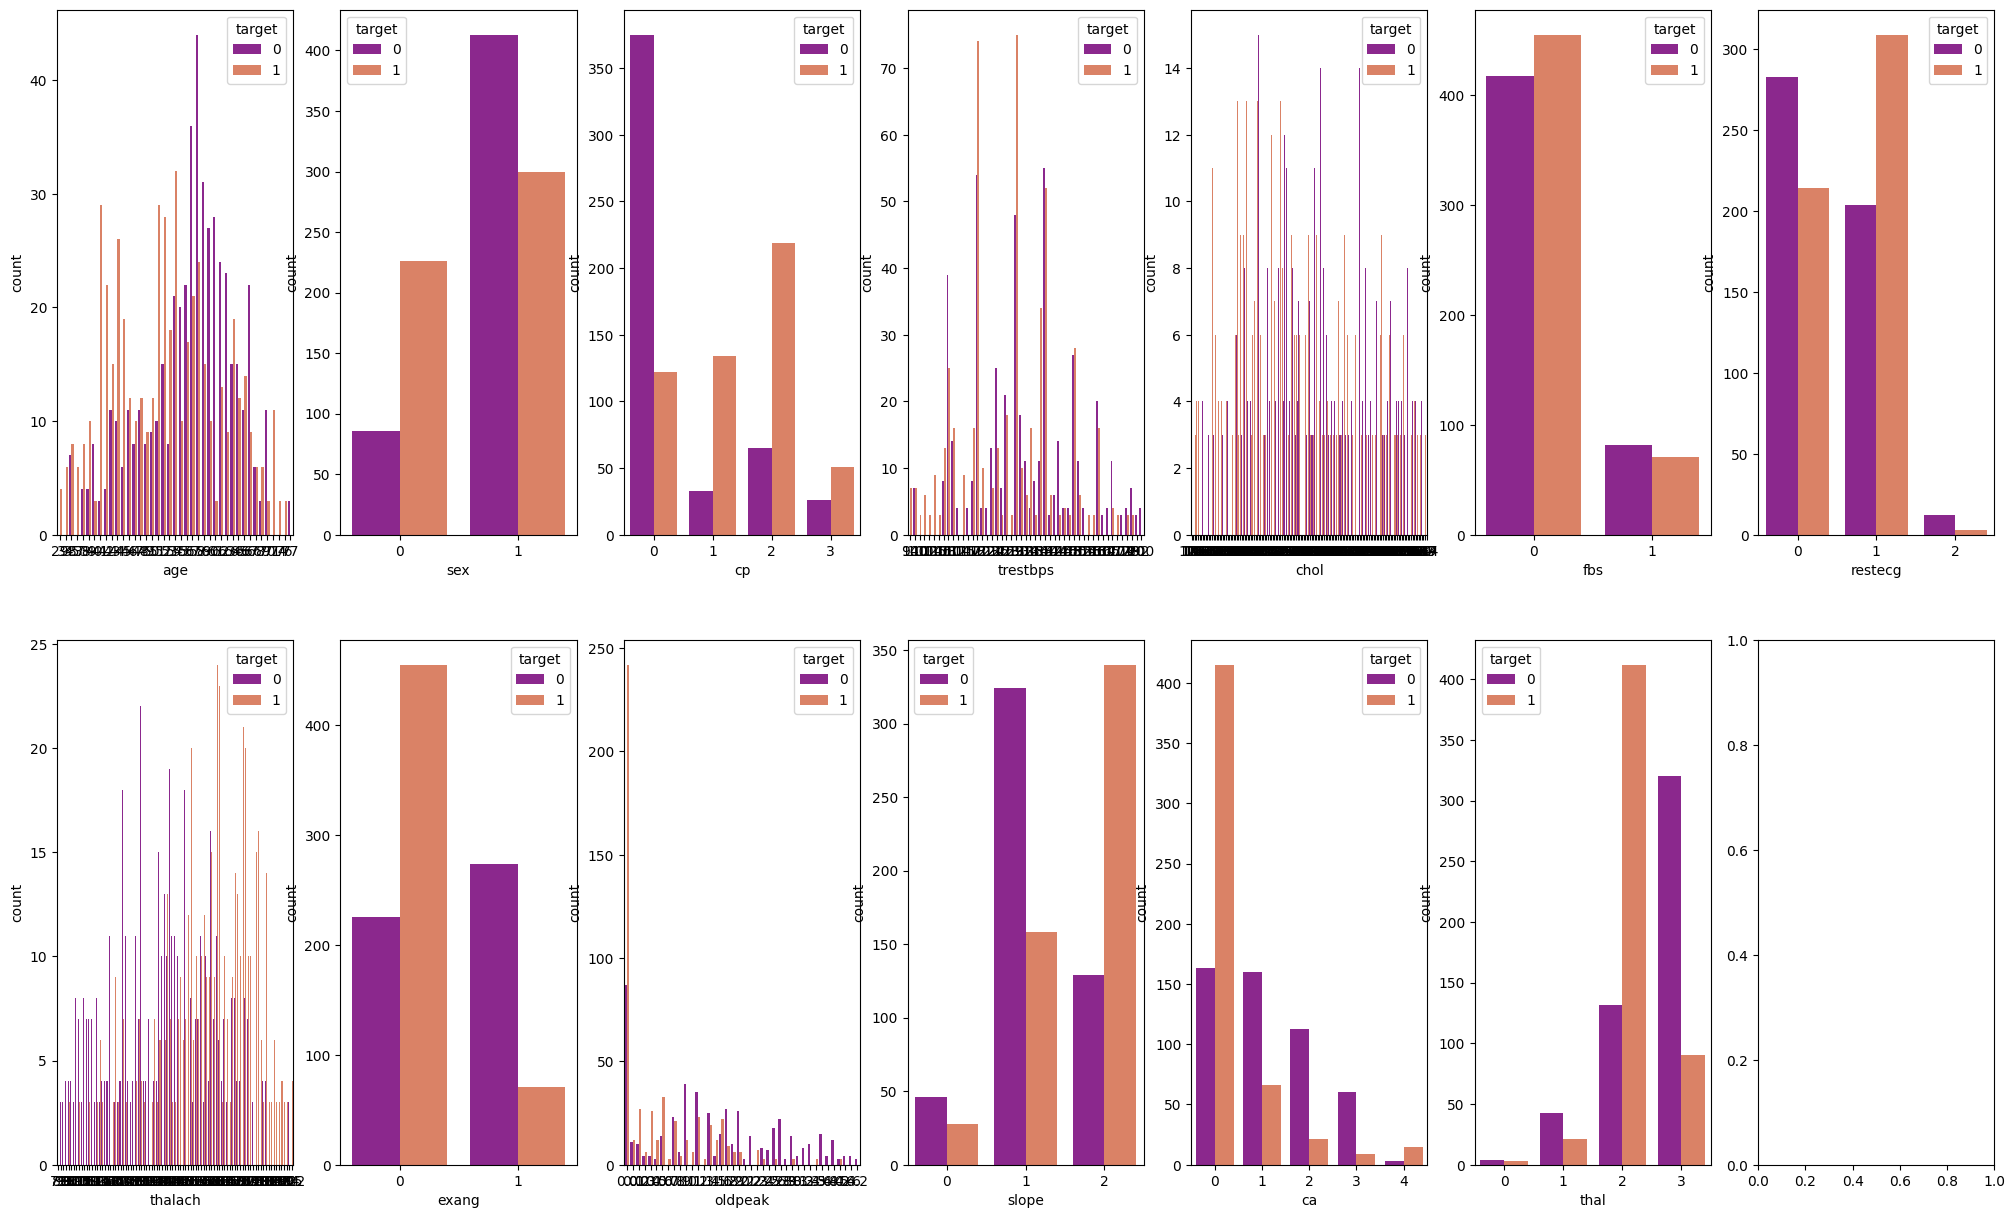

In [65]:
fig, subplot_matrix = plt.subplots(2, 7, figsize=(25, 15))
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
row_index = 0
column_index = 0

# Plotting countplots for each significant feature
for feature in selected_features:
    sns.countplot(x=feature, data=data, hue='target', ax=subplot_matrix[row_index, column_index], palette='plasma')
    column_index += 1
    if column_index == 7:
        column_index = 0
        row_index += 1

# plt.savefig('visualization.png')
plt.show()


<Axes: >

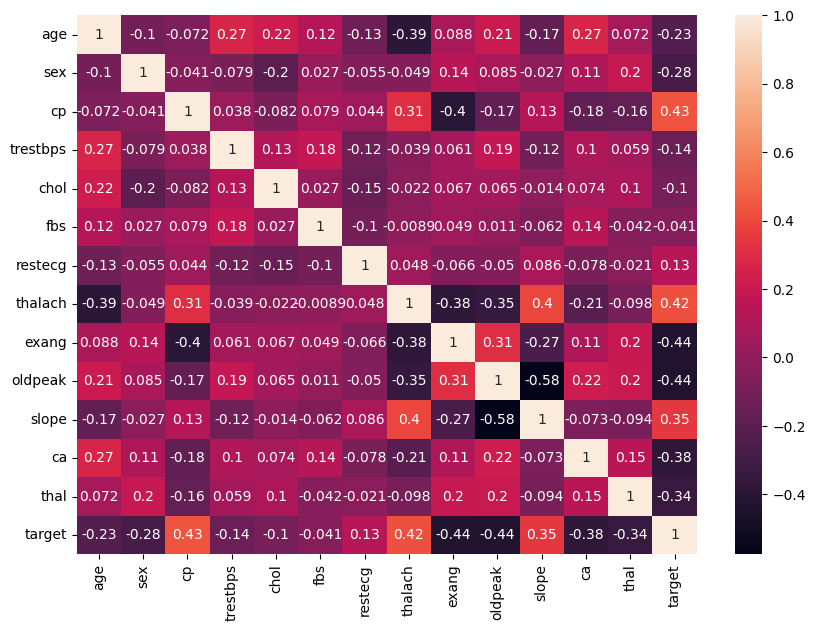

In [66]:
cor= data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(cor,annot=True)

In [67]:
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for feature in selected_features:
    print(data[feature].value_counts())

# print(data["fbs"].value_counts())
# print(data["oldpeak"].value_counts())


58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
1    713
0    312
Name: sex, dtype: int64
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3


We will take columns with unique values more than 6 and plot the rowsto boxplot to see if we have too many detached values that will hamper the result of our training model.

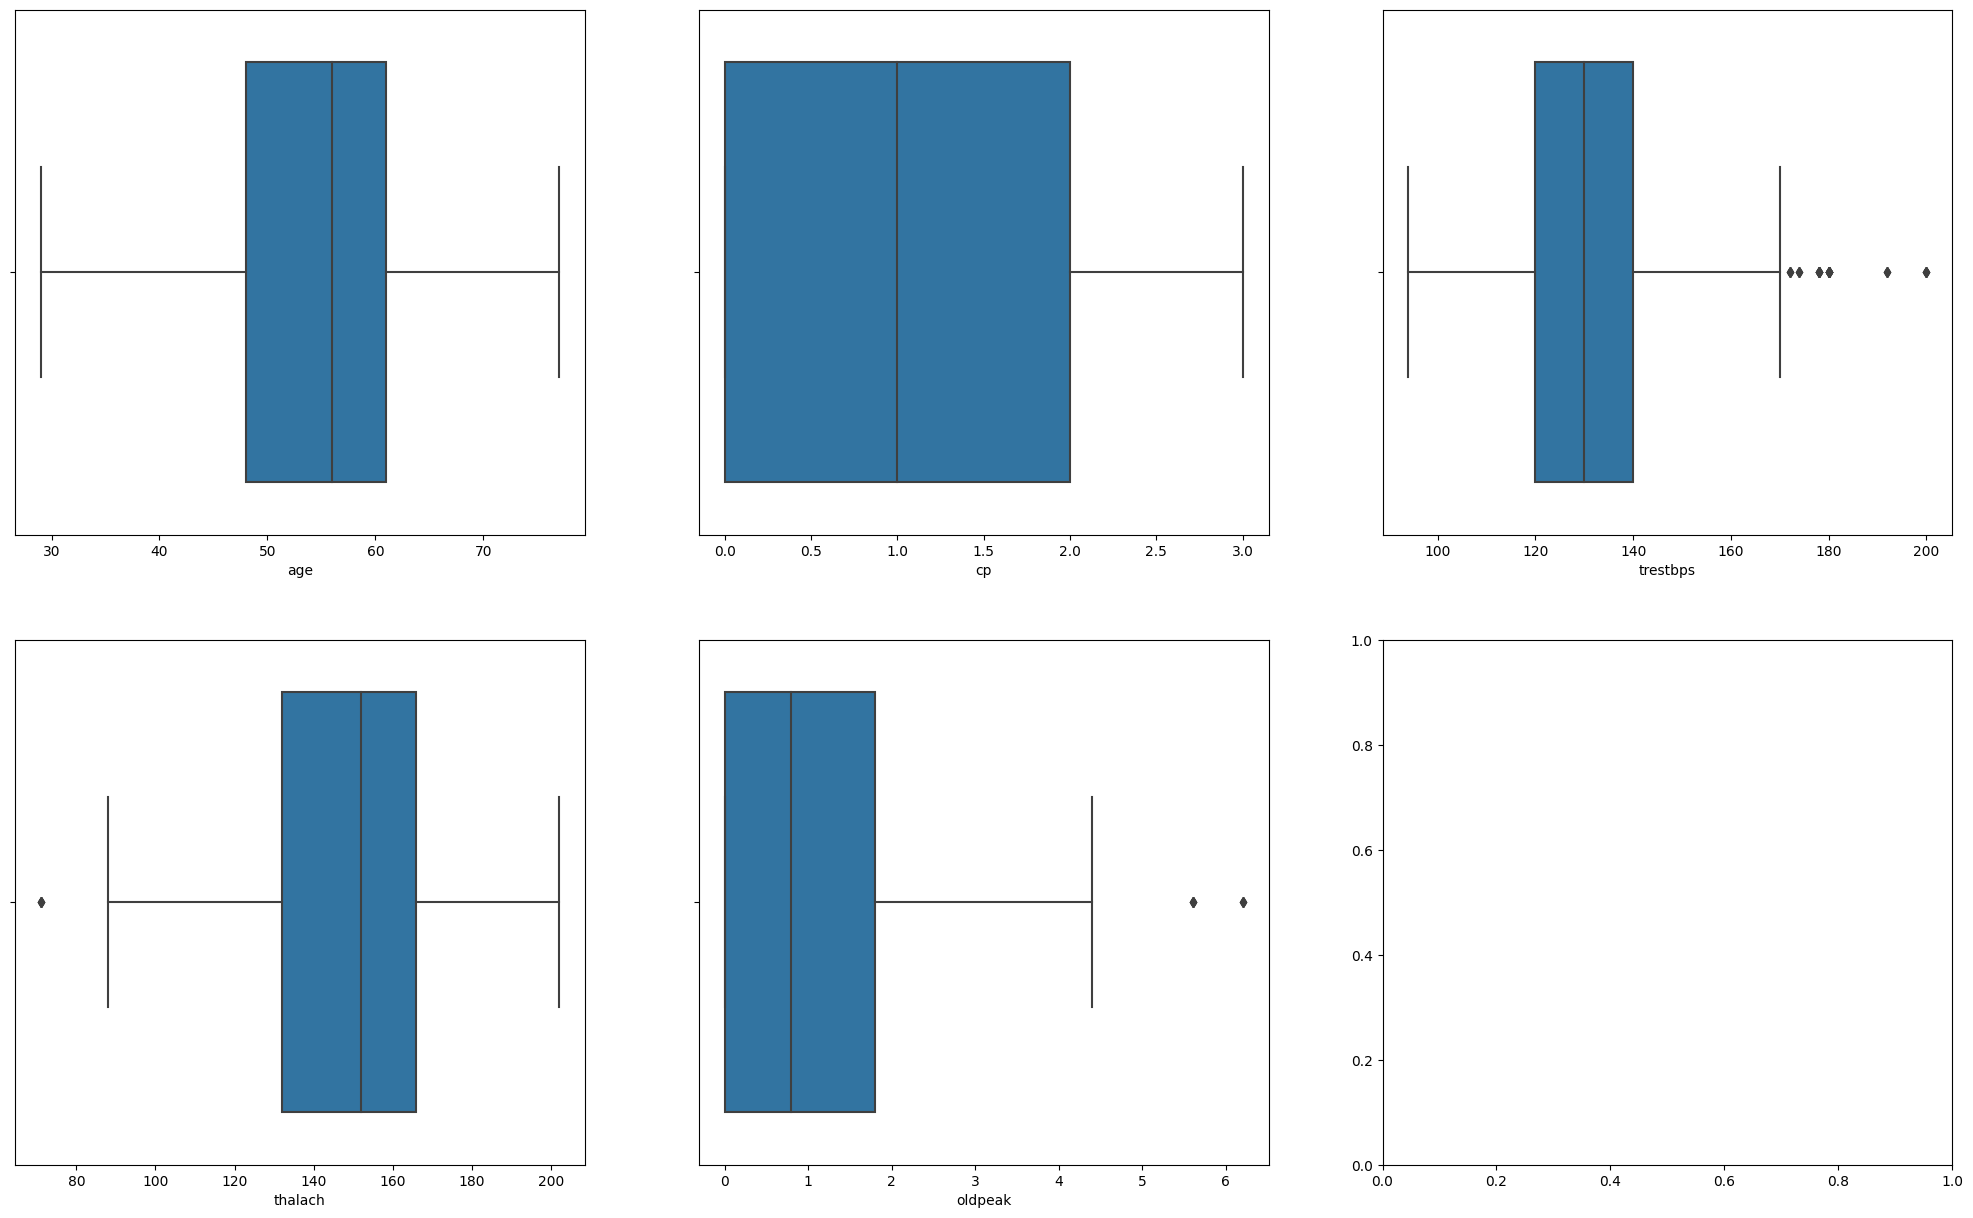

In [68]:
selected_features = ['age', 'cp', 'trestbps', 'thalach', 'oldpeak']
fig, subplot_matrix = plt.subplots(2, 3, figsize=(25, 15))
row_index = 0
column_index = 0

for feature in selected_features:
    sns.boxplot(data=data, x=feature, ax=subplot_matrix[row_index, column_index])
    column_index += 1
    if column_index == 3:
        column_index = 0
        row_index += 1
plt.show()



In [69]:
# Applying logarithm transformation to the 'trestbps' column
for column in ['trestbps']:
    data[column] = np.log(data[column])


In [70]:
# Target variable
target_variable = data["target"]

# Features
features = data.drop('target', axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.20, random_state=0)



In [71]:
# Creating a StandardScaler instance
feature_scaler = StandardScaler()

# Scaling the training features
X_train_scaled = feature_scaler.fit_transform(X_train)

# Scaling the testing features
X_test_scaled = feature_scaler.transform(X_test)




Accuracy of Logistic Regression: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

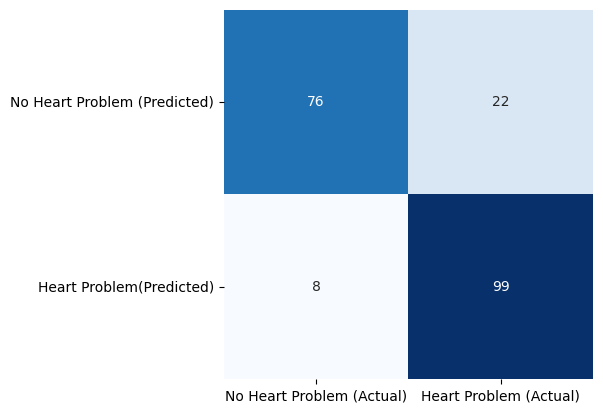

In [72]:
# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_fit = lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print("\n")
print("Accuracy of Logistic Regression:", lr_acc * 100, '\n')
print(classification_report(y_test, lr_pred))
sns.heatmap(lr_conf_matrix, xticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            yticklabels=["No Heart Problem (Predicted)","Heart Problem(Predicted)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)




Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



<Axes: >

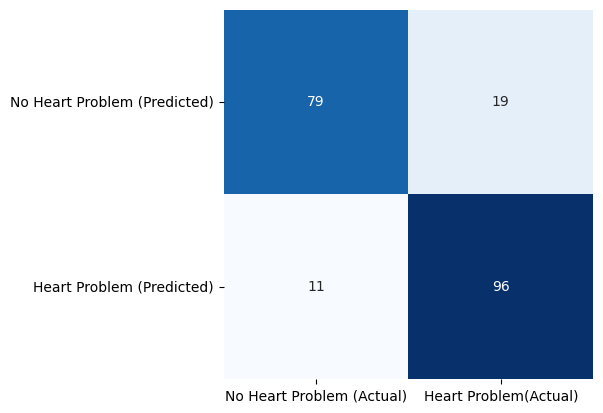

In [73]:
# Model 2: Naive Bayes
nb_model = GaussianNB()
nb_fit = nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("\n")
print("Accuracy of Naive Bayes model:", nb_accuracy * 100, '\n')
print(classification_report(y_test, nb_pred))

# Plotting confusion matrix
sns.heatmap(nb_conf_matrix, xticklabels=["No Heart Problem (Actual)","Heart Problem(Actual)"],
            yticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)




Accuracy of Random Forest Classifier: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



<Axes: >

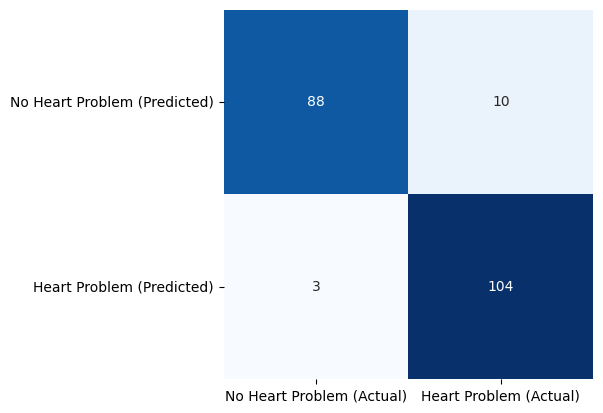

In [74]:
# Model 3: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\n")
print("Accuracy of Random Forest Classifier:", rf_accuracy * 100, '\n')
print(classification_report(y_test, rf_pred))

# Plotting confusion matrix
sns.heatmap(rf_conf_matrix, xticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            yticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



Accuracy of K-Neighbors Classifier: 80.48780487804879 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        98
           1       0.84      0.78      0.81       107

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



<Axes: >

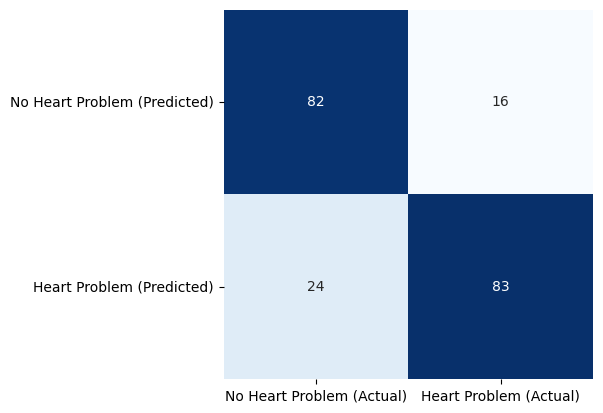

In [75]:
# Model 4: K-Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_fit = knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("\n")
print("Accuracy of K-Neighbors Classifier:", knn_accuracy * 100, '\n')
print(classification_report(y_test, knn_pred))

# Plotting confusion matrix
sns.heatmap(knn_conf_matrix, xticklabels=["No Heart Problem (Actual)","Heart Problem (Actual)"],
            yticklabels=["No Heart Problem (Predicted)","Heart Problem (Predicted)"],
            square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
